# Part 1 - Exploratory Data Analysis on logins.json

## Packages

In [1]:
import os
import json

import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt

## Load Data

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Json File
file_path = '/content/drive/MyDrive/Colab Notebooks/Springboard - ultimate_challenge/'
logins_file = os.path.join(file_path, "logins.json")

# Open Json File and load to pandas dataframe
f = open(logins_file)
logins_data = json.load(f)

print(logins_data)

logins_df = pd.json_normalize(logins_data, record_path=['login_time'])

f.close()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# Examine the first 5 
logins_df.head()

,0
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# Rename column to DateTime
logins_df.rename(columns={logins_df.columns[0]:'DateTime'}, inplace = True)

logins_df.columns

Index(['DateTime'], dtype='object')

In [6]:
# Convert to DateTime type
print(logins_df.info())

logins_df['DateTime'] = pd.to_datetime(logins_df['DateTime'])

print(logins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


In [7]:
# Add new column to count logins
logins_df['logins'] = 1

In [8]:
# Re-examine the dataframe
logins_df.head(5)

,DateTime,logins
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


## Explore quality of data

In [9]:
# Number of months in data
list(set(logins_df["DateTime"].dt.to_period('M')))

[Period('1970-01', 'M'),
 Period('1970-03', 'M'),
 Period('1970-02', 'M'),
 Period('1970-04', 'M')]

In [10]:
# Number of days per month in data
monthList = ["1970-01", "1970-02", "1970-03", "1970-04"]

for month in monthList:
  print(month)
  print(list(set(logins_df[logins_df["DateTime"].dt.to_period('M') == month]["DateTime"].dt.day)))

1970-01
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
1970-02
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
1970-03
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
1970-04
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


There are 4 months in the data, with full months for January, February, and March. But only up to the 13th day for April.

In [11]:
# Intervals at Month, Week, Day, Hourly, 15 min
intervals = ["M", "W", "D", "H", "15T"]
intervals_names = ["Monthly", "Weekly", "Daliy", "Hourly", "15 Minutes"]

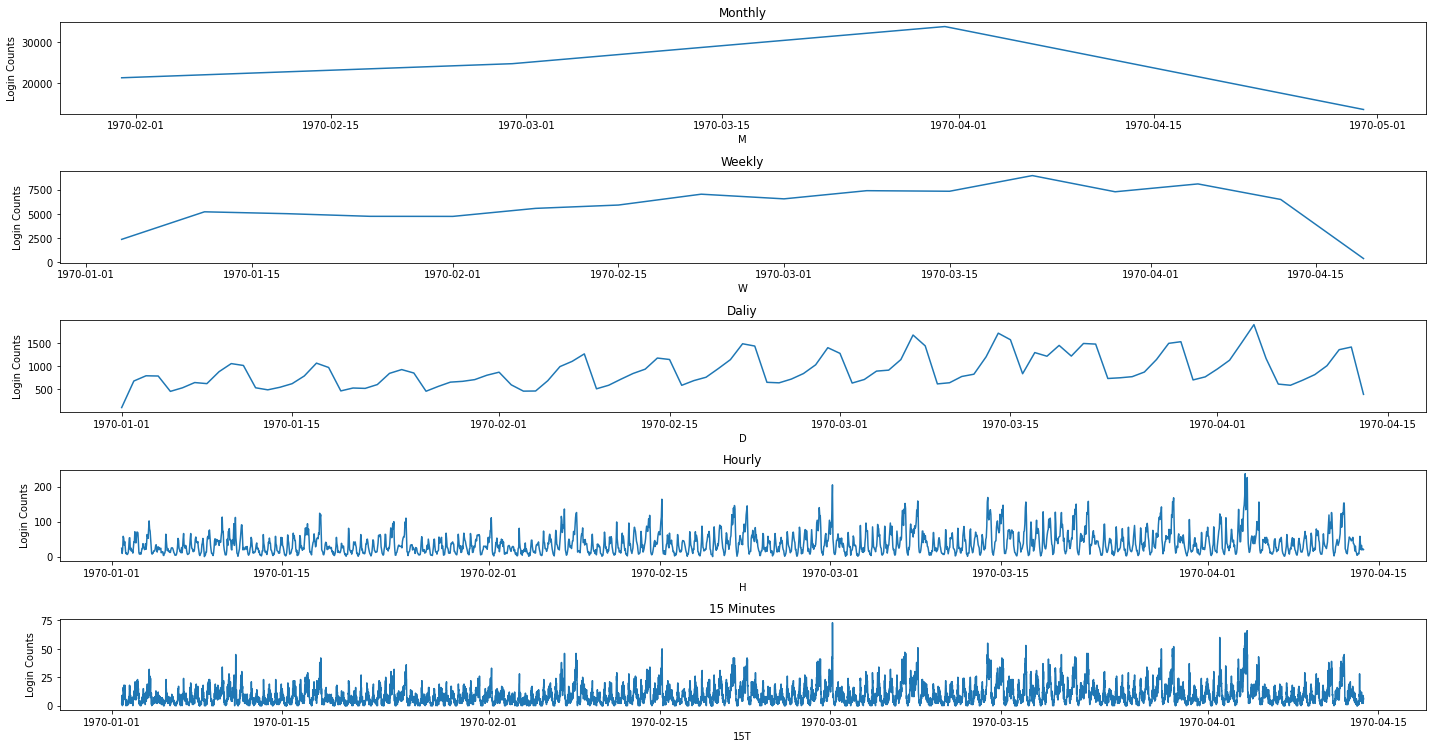

In [12]:
fig, ax = plt.subplots(5,1)
fig.set_size_inches(20, 10.5, forward=True)

for i, interval in enumerate(intervals):
    df_interval = logins_df.resample(interval,  on="DateTime").logins.sum()
    df_interval = pd.DataFrame(df_interval).reset_index()
    ax[i].plot(df_interval["DateTime"], df_interval["logins"])
    ax[i].set_xlabel(interval)
    ax[i].set_ylabel("Login Counts")
    ax[i].set_title(intervals_names[i])

plt.tight_layout()
plt.show()

Stacking and plotting the intervals starting with Monthly and ending with the required 15 minute intervals shows an increasing trend in the number of logins. Ignoring the incomplete last month of April, it can be seen in the monthly interval that starting in January, there is an increase in logins up to March.
The smaller intervals show the similar trend except some finer details in where the customer logged in additional times within shorter intervals. Most likely this trend extend into April if more data points were collected past the cut-off.

In [13]:
# Aggregate into the 15 minute interval for further finer evaluation
df_15T = logins_df.resample("15T",  on="DateTime").logins.sum()
df_15T = pd.DataFrame(df_15T).reset_index()

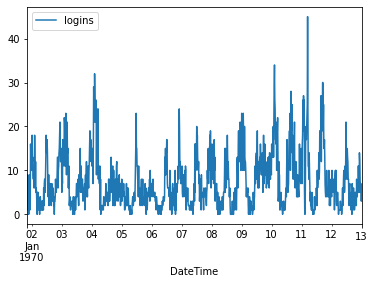

In [14]:
# Inital 13 days
start_date = "1970-1-1"
end_date = "1970-1-13"

after_start_date = df_15T["DateTime"] >= start_date
before_end_date = df_15T["DateTime"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df_15T.loc[between_two_dates]

filtered_dates.plot(x="DateTime", y="logins")

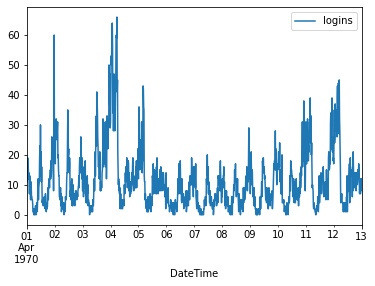

In [15]:
# Last 13 days
start_date = "1970-4-1"
end_date = "1970-4-13"

after_start_date = df_15T["DateTime"] >= start_date
before_end_date = df_15T["DateTime"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df_15T.loc[between_two_dates]

filtered_dates.plot(x="DateTime", y="logins")

Looking at the beginning vs the end of the data, the scaling shows that there is an higher amount of logins towards the end of the data in April vs the starting month in January. But still shows a similar cycle of login times between the two.

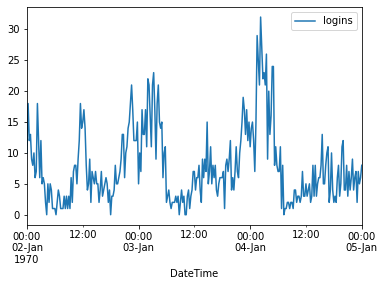

In [16]:
# Looking at a 3 day timeframe at the start
start_date = "1970-1-2"
end_date = "1970-1-5"

after_start_date = df_15T["DateTime"] >= start_date
before_end_date = df_15T["DateTime"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df_15T.loc[between_two_dates]

filtered_dates.plot(x="DateTime", y="logins")

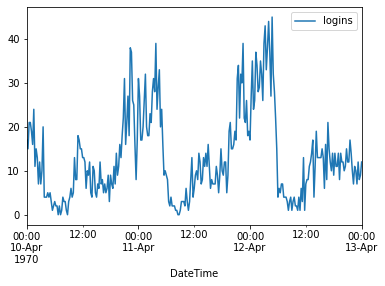

In [17]:
# Looking at a 3 day timeframe at the end
start_date = "1970-4-10"
end_date = "1970-4-13"

after_start_date = df_15T["DateTime"] >= start_date
before_end_date = df_15T["DateTime"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df_15T.loc[between_two_dates]

filtered_dates.plot(x="DateTime", y="logins")

This comparision in a closer timeframe shows that the customer logins in the most at 12 hour intervals, with a local maximum at each interval.

# Part 2 - Experiment and Metric Design

1) Since the goal is to see an increase in driving partners of one city in the other, a metric I would use to evaluate this would be mark each driving partner to their respective city and then count the number of pickups they perform in each city on a daily basis.

This metric will include the goal of the experiment, but additional information that may be used to evaluate any other trends that is caused by the reimbusrment of the toll.

Using the collected metrics, for each city, the total number of drivers of either Gotham or Metropolis would be counted up.

2) An outline of the experiment to implement:

*   All driving partners to be marked to their respective city.
*   Alternating days for the reimbusrment for the toll
  * Monday, Wednesday, Friday, Sunday - Tolls Collected
  * Tuesday, Thursday, Saturday - Tolls Reimbursed
* Experimental period could be 2 months, with the focus being on weekly cycling since that is the general population work/life schedule.
* Using the collected metric, perform a statistical test between the total number of counted pickups of drivers in the opposite city between the tolls and reimbursement. The Friday can be ignored to make the number of days of tolls and reimbursment the same.
* The statistical test can show that there is a difference in the number of drivers in the opposite city, but a graphical respresentation can be shown to see the number of drivers in the opposite city. If the experiment is successful, there should be spikes of increased drivers in opposite cities on Tuesday, Thursday and Saturday.
* Evaluation of Saturday and Sunday will show that with normalized operating hours, there is an increase in number of drivers in the opposite city.



# Part 3 - Predictive Modeling

## Packages

In [181]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import os
import json
import datetime as dt
import collections
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



## Load Data

In [19]:
# Load Json File
file_path = '/content/drive/MyDrive/Colab Notebooks/Springboard - ultimate_challenge/'
ultimate_file = os.path.join(file_path, "ultimate_data_challenge.json")

# Open Json File and load to pandas dataframe
f = open(ultimate_file)
ultimate_data = json.load(f)

ultimate_df = pd.json_normalize(ultimate_data)

f.close()

## Data Wrangling

In [20]:
print(ultimate_df.head(4).T)

                                     0           1           2               3
city                    King's Landing     Astapor     Astapor  King's Landing
trips_in_first_30_days               4           0           3               9
signup_date                 2014-01-25  2014-01-29  2014-01-06      2014-01-10
avg_rating_of_driver               4.7         5.0         4.3             4.6
avg_surge                          1.1         1.0         1.0            1.14
last_trip_date              2014-06-17  2014-05-05  2014-01-07      2014-06-29
phone                           iPhone     Android      iPhone          iPhone
surge_pct                         15.4         0.0         0.0            20.0
ultimate_black_user               True       False       False            True
weekday_pct                       46.2        50.0       100.0            80.0
avg_dist                          3.67        8.26        0.77            2.36
avg_rating_by_driver               5.0         5.0  

In [21]:
ultimate_df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [22]:
print(ultimate_df.shape)
print(ultimate_df.info())

(50000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


In [23]:
# Convert dates to datetime types
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

print(ultimate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [24]:
# Numerical Data
numData = ultimate_df.select_dtypes(['float64', 'int64'])
print(numData.columns)

# Catagorical Data
cat_cols = set(ultimate_df.columns) - set(numData.columns)
catData = ultimate_df[cat_cols]
print(catData.columns)

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'],
      dtype='object')
Index(['ultimate_black_user', 'phone', 'last_trip_date', 'signup_date',
       'city'],
      dtype='object')


In [25]:
# Count the missing data
missing_data = pd.concat([ultimate_df.isnull().sum(), 100 * ultimate_df.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
avg_rating_of_driver,8122,16.244
phone,396,0.792
avg_rating_by_driver,201,0.402
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000


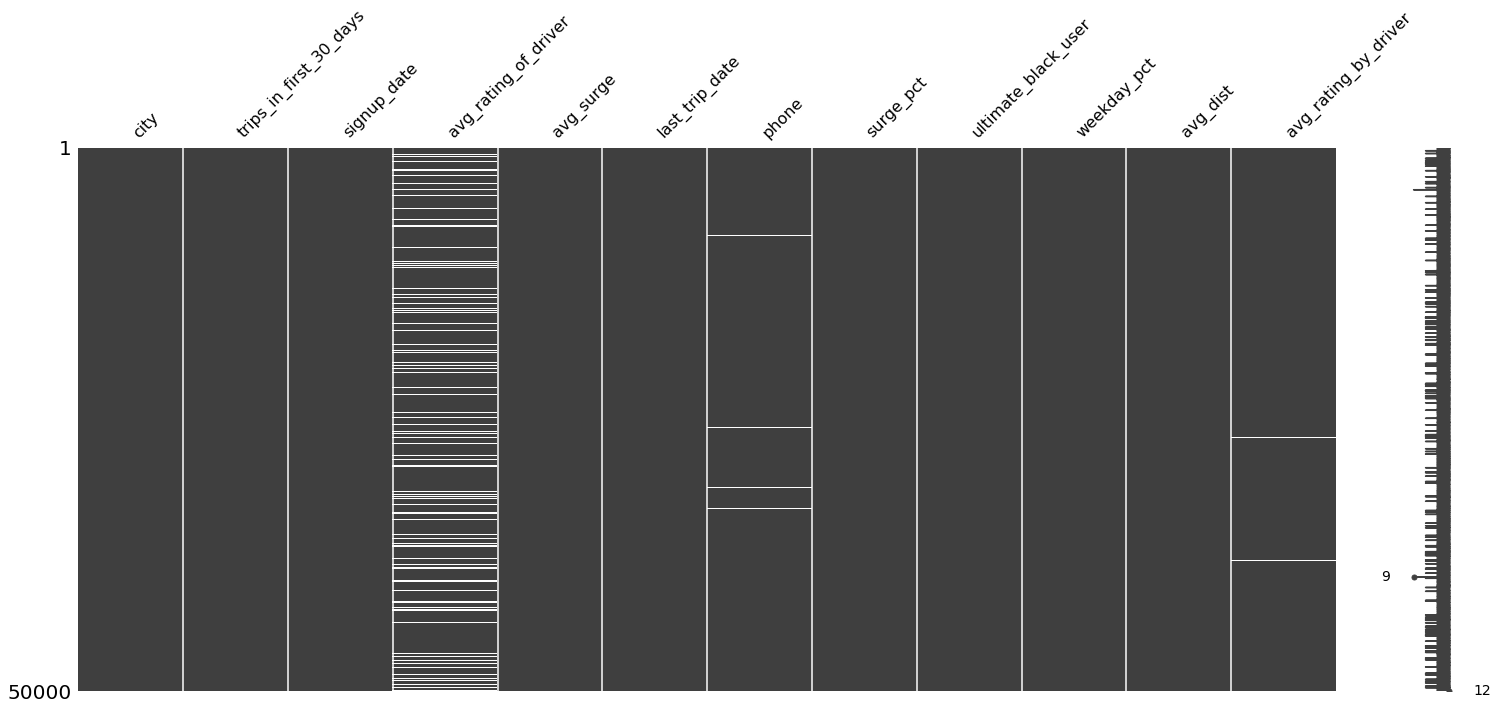

In [26]:
msno.matrix(ultimate_df)
plt.show()

There is an acceptable low amount of missing data for `phone` and `avg_rating_by_driver`, but the `avg_rating_of_driver` will need to be handled either with imputation or deletion. 

In [27]:
def uniqueChecker(col):
    return ultimate_df[col].unique()

for col in ultimate_df.columns:
    print(col, uniqueChecker(col))

city ["King's Landing" 'Astapor' 'Winterfell']
trips_in_first_30_days [  4   0   3   9  14   2   1   6  24   5   7  11  73   8  10  22  15  13
  17  20  12  42  27  26  18  16  40  28  19  23  33  48  31  71  25  21
  34  29  30  32  47  37  53  43  44  38  39  49  55 125  41  50  63  35
  54  56  36  51  58]
signup_date ['2014-01-25T00:00:00.000000000' '2014-01-29T00:00:00.000000000'
 '2014-01-06T00:00:00.000000000' '2014-01-10T00:00:00.000000000'
 '2014-01-27T00:00:00.000000000' '2014-01-09T00:00:00.000000000'
 '2014-01-24T00:00:00.000000000' '2014-01-28T00:00:00.000000000'
 '2014-01-21T00:00:00.000000000' '2014-01-03T00:00:00.000000000'
 '2014-01-13T00:00:00.000000000' '2014-01-15T00:00:00.000000000'
 '2014-01-11T00:00:00.000000000' '2014-01-12T00:00:00.000000000'
 '2014-01-02T00:00:00.000000000' '2014-01-31T00:00:00.000000000'
 '2014-01-19T00:00:00.000000000' '2014-01-16T00:00:00.000000000'
 '2014-01-26T00:00:00.000000000' '2014-01-05T00:00:00.000000000'
 '2014-01-17T00:00:00.00000

In [28]:
ultimate_df.fillna(value=np.nan, inplace=True)

Skimming through the unique values for each column, it looks like the missing / null values matches up with what was identified earlier without any other types of values that would be considered null. Using fillna to ensure all nan values are consistent.

In [29]:
# Number of months in signup_date
print(list(set(ultimate_df["signup_date"].dt.to_period('M'))))

# Number of days in signup_date
sorted(list(set(ultimate_df["signup_date"].dt.to_period('D'))))

[Period('2014-01', 'M')]


[Period('2014-01-01', 'D'),
 Period('2014-01-02', 'D'),
 Period('2014-01-03', 'D'),
 Period('2014-01-04', 'D'),
 Period('2014-01-05', 'D'),
 Period('2014-01-06', 'D'),
 Period('2014-01-07', 'D'),
 Period('2014-01-08', 'D'),
 Period('2014-01-09', 'D'),
 Period('2014-01-10', 'D'),
 Period('2014-01-11', 'D'),
 Period('2014-01-12', 'D'),
 Period('2014-01-13', 'D'),
 Period('2014-01-14', 'D'),
 Period('2014-01-15', 'D'),
 Period('2014-01-16', 'D'),
 Period('2014-01-17', 'D'),
 Period('2014-01-18', 'D'),
 Period('2014-01-19', 'D'),
 Period('2014-01-20', 'D'),
 Period('2014-01-21', 'D'),
 Period('2014-01-22', 'D'),
 Period('2014-01-23', 'D'),
 Period('2014-01-24', 'D'),
 Period('2014-01-25', 'D'),
 Period('2014-01-26', 'D'),
 Period('2014-01-27', 'D'),
 Period('2014-01-28', 'D'),
 Period('2014-01-29', 'D'),
 Period('2014-01-30', 'D'),
 Period('2014-01-31', 'D')]

In [30]:
# Number of months in data
sorted(list(set(ultimate_df["last_trip_date"].dt.to_period('M'))))

[Period('2014-01', 'M'),
 Period('2014-02', 'M'),
 Period('2014-03', 'M'),
 Period('2014-04', 'M'),
 Period('2014-05', 'M'),
 Period('2014-06', 'M'),
 Period('2014-07', 'M')]

In [31]:
# Number of days per month in data
monthList = ["2014-01", "2014-02", "2014-03", "2014-04", "2014-05", "2014-06", "2014-07"]

for month in monthList:
  print(month)
  print(list(set(ultimate_df[ultimate_df["last_trip_date"].dt.to_period('M') == month]["last_trip_date"].dt.day)))

2014-01
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
2014-02
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
2014-03
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
2014-04
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
2014-05
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
2014-06
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
2014-07
[1]


To note, there is only one day in july that has data.

## Exploratory Data Analysis

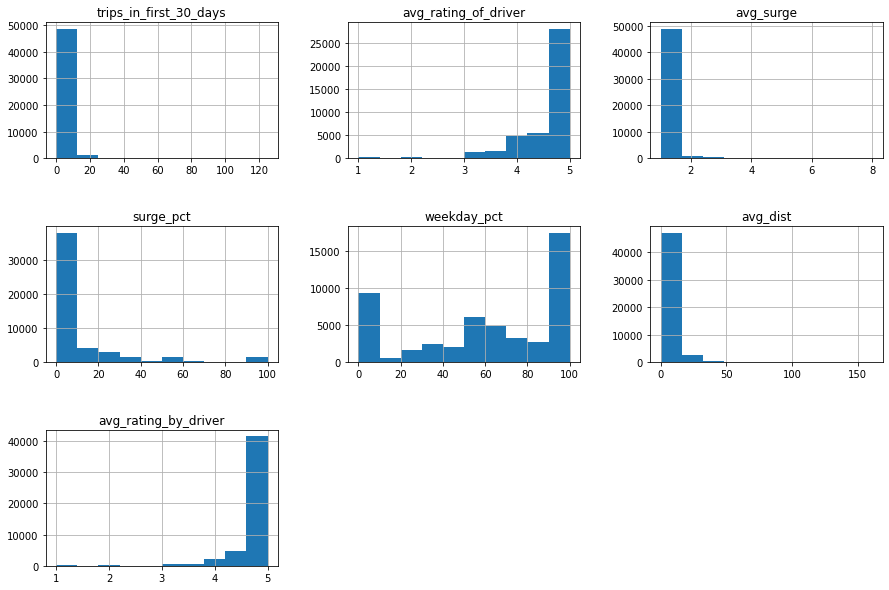

In [32]:
# Plot the numerical data
numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

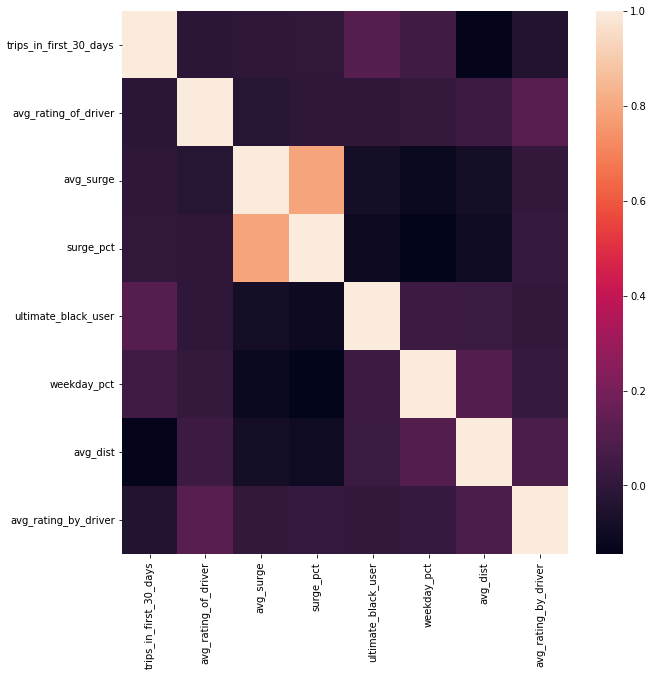

In [33]:
plt.figure(figsize=(10,10))

sns.heatmap(ultimate_df.corr())
plt.show()

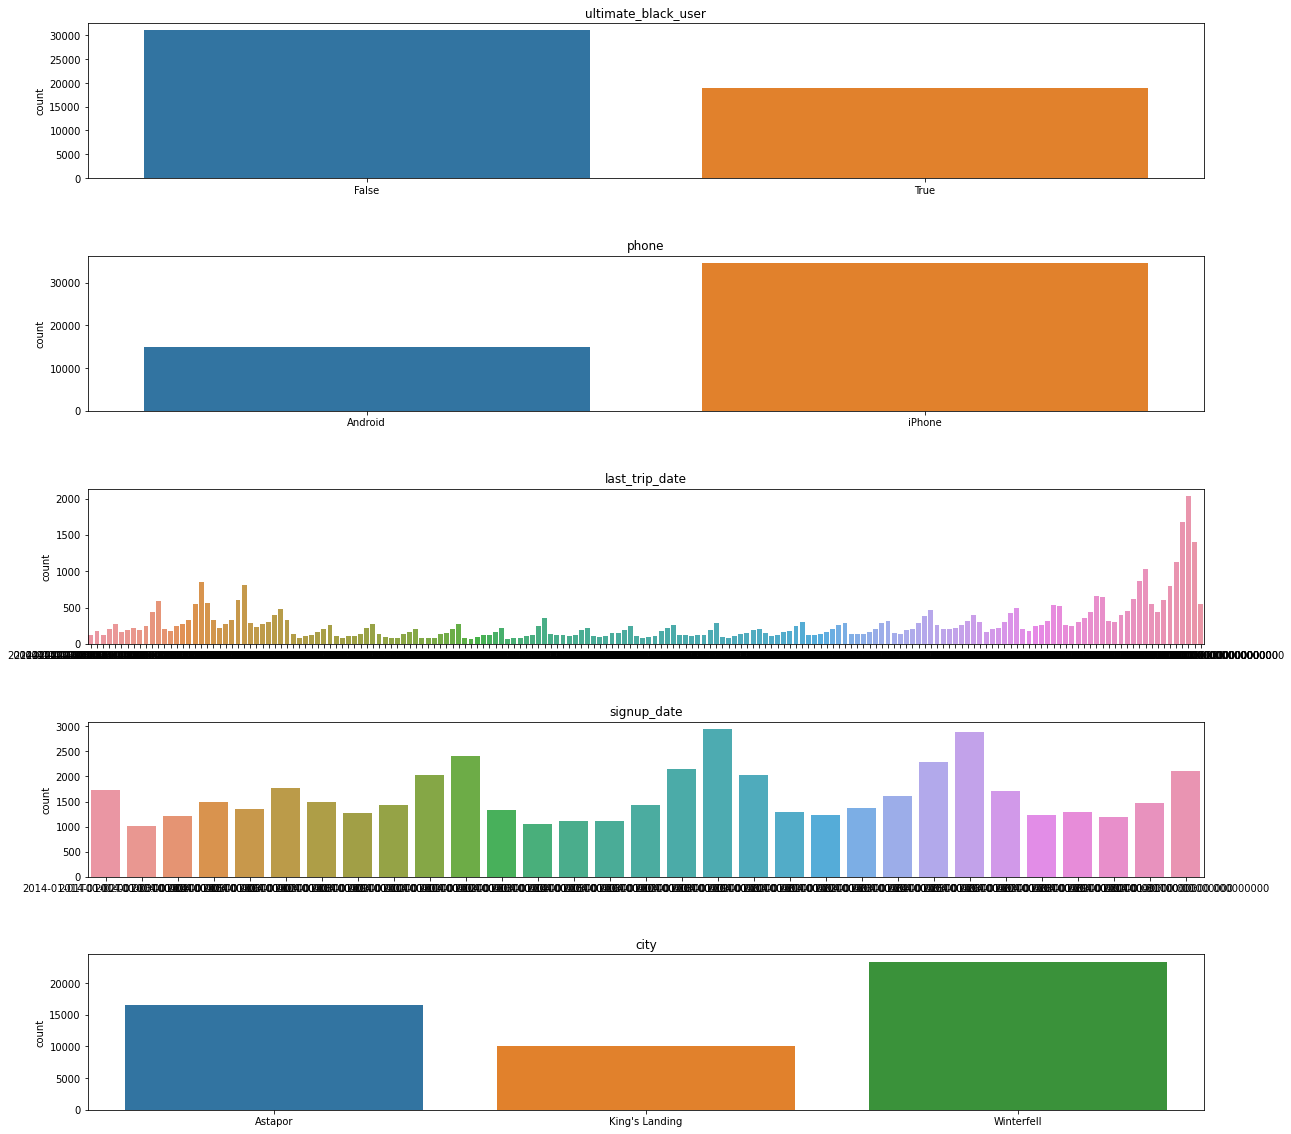

In [34]:
# Plot the catagorical data
cols = catData.columns
cols.sort_values()
fig, ax = plt.subplots(len(cols), figsize = (20,20))

for i, col in enumerate(cols):
    sns.countplot(x=col,
                  data=catData.sort_values(by=col),
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

Note: For plot of `signup_date` and `last_trip_date`, they are in sorted ascending order of each day.

In [35]:
# "Active" if customer took a trip in the preceding 30 days of the data pull ie the last 30 days in the data.
last_date = dt.datetime.strptime("2014-07-1", '%Y-%m-%d')
active_cutoff = last_date - dt.timedelta(days=30)

ultimate_df["Active_Users"] = ["Active" if last_trip >= active_cutoff else "Not Active" for last_trip in ultimate_df["last_trip_date"]]

# Drop Signup Date and signup_date and last_trip_date since this is covered by Active_Users
ultimate_df.drop(["signup_date", "last_trip_date"], axis=1, inplace=True)

In [36]:
print("Total Number of Customers:", ultimate_df.shape[0])
print("Total Number of Active Customers:", ultimate_df["Active_Users"].value_counts()[1])
print("Total Number of Not Active Customers:", ultimate_df["Active_Users"].value_counts()[0])
print("Fraction of Active Customers:", ultimate_df["Active_Users"].value_counts()[1] / ultimate_df.shape[0])

Total Number of Customers: 50000
Total Number of Active Customers: 18804
Total Number of Not Active Customers: 31196
Fraction of Active Customers: 0.37608


Status | Count
Active        18804
Not Active    31196
Name: Active_Users, dtype: int64


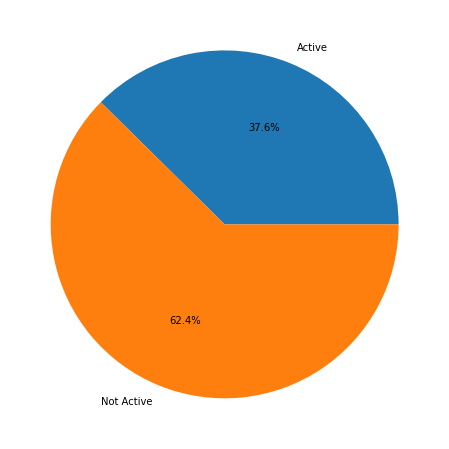

In [37]:
user_counts = ultimate_df.Active_Users.value_counts().sort_index()
print("Status |", "Count")
print(user_counts)

plt.figure(figsize=(8,8))
mylab = user_counts.index

plt.pie(user_counts, labels=mylab, autopct='%1.1f%%')
plt.show()

## Modeling

Defined Problem: Determine whether or not a user will be active in their 6th month on the system.

#### Preprocessing Pipeline

In [38]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   49604 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  Active_Users            50000 non-null  object 
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 3.9+ MB


In [135]:
# Split the data into feature X and target y
X = ultimate_df.drop(columns="Active_Users", axis=1)
y = ultimate_df.Active_Users

# Label encode target y
le = LabelEncoder()
le.fit(y)
le.classes_ = np.array(["Not Active", "Active"])
encoded_y = le.transform(y)

# Train Test Split by 30%
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size = 0.3, random_state=123)

In [136]:
# Grouped numerical columns
num_cols = ultimate_df.select_dtypes(['float64', 'int64']).columns

# Grouped categorical columns
cat_cols = set(ultimate_df.columns) - set(numData.columns)
cat_cols = ultimate_df[cat_cols]
cat_cols = cat_cols.drop(columns="Active_Users").columns

# Preprocessing for numerical data
num_preprocessor = SimpleImputer(strategy='constant', fill_value=-99)

# Preprocessing for categorical data
cat_preprocessor = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value="-99")),
                                   ('oe', OrdinalEncoder())])

# Combine num and cat preprocessor for data frame transformation
preprocessor = ColumnTransformer(
    transformers=[('num_transformer', num_preprocessor, num_cols),
                  ('cat_transformer', cat_preprocessor, cat_cols)])

For the preprocessing, I use a simpleimputer to convert all missing data into -99 value, which will place it as its own group with no value association with the current data. As well as ordinalencoder for catagorical data. The missing values could be explored after modeling to see if they contribute any information not see in the EDA.

### Baseline Comparisons of Models

*   Logistic Regression
*   Random Forest
*   Support Vector Machine



In [137]:
# Logistic Regression
pipe_logit = Pipeline(steps=[('preprocessor', preprocessor),
                             ('scaler', StandardScaler()),
                             ('logit_clf', LogisticRegression(random_state=123))])

pipe_logit.fit(X_train, y_train)

pred_tr = pipe_logit.predict(X_train)

print(classification_report(y_train, pred_tr))

scores = cross_val_score(pipe_logit, X_train, y_train, scoring='recall', cv=10, n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

              precision    recall  f1-score   support

           0       0.72      0.86      0.78     21892
           1       0.65      0.44      0.52     13108

    accuracy                           0.70     35000
   macro avg       0.68      0.65      0.65     35000
weighted avg       0.69      0.70      0.68     35000

Scores: [43.96946565 43.66412214 43.70709382 44.92753623 45.15636918 44.46987033
 42.71548436 42.10526316 42.79176201 44.24103738]
Mean: 43.7748004262232
Standard Deviation: 0.009417340006934078


In [162]:
# Random Forest
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('scaler', StandardScaler()),
                          ('randomforest_clf', RandomForestClassifier(random_state=123))])

pipe_rf.fit(X_train, y_train)

pred_tr = pipe_rf.predict(X_train)

print(classification_report(y_train, pred_tr))

scores = cross_val_score(pipe_rf, X_train, y_train, scoring='recall', cv=10, n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21892
           1       1.00      0.99      1.00     13108

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000

Scores: [65.49618321 64.58015267 66.36155606 66.36155606 65.064836   66.74294432
 64.7597254  64.7597254  67.88710908 66.59038902]
Mean: 65.86041772203492
Standard Deviation: 0.010367840292120404


In [139]:
# Support Vector Machine
pipe_svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler()),
                           ('svm_clf', SVC(random_state=123, kernel="linear"))])

pipe_svc.fit(X_train, y_train)

pred_tr = pipe_svc.predict(X_train)

print(classification_report(y_train, pred_tr))

scores = cross_val_score(pipe_svc, X_train, y_train, scoring='recall', cv=10, n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

              precision    recall  f1-score   support

           0       0.68      0.93      0.79     21892
           1       0.70      0.29      0.41     13108

    accuracy                           0.69     35000
   macro avg       0.69      0.61      0.60     35000
weighted avg       0.69      0.69      0.64     35000

Scores: [28.70229008 27.78625954 28.75667429 30.35850496 28.52784134 27.45995423
 27.07856598 28.75667429 29.44317315 29.6720061 ]
Mean: 28.65419439737745
Standard Deviation: 0.009625232758325098


I compared 3 different base models: logistic regression classifier, random forest classifier, and support vector machine classifier (linear). I chosed these models to explore due to their capability for feature importance. I used recall as the metric of comparision since the goal from a business perspective is to capture all of the Active customers.

The random forest classifier outperformed both the logistic regression and svm classifiers.

I will build a model using random forest classifier with hyperparameter tuning.

### Random Grid Search with CV Functions

In [169]:
def rand_search_eval(input_X, input_y, estimator, hype_params):
    
    """
    Function performs RandomizedSearchCV on inputted hyper parameters.
    After models are created, the mean score and standard deviation of each iteration is stored.
    The model is graphed against Recall score.
    The top 5 models are listed with their scores and iteration number for identification
    Best parameters and best score are printed too.
    """
    
    # Random Search with CV of the hyper parameters
    rand_search = RandomizedSearchCV(
        n_jobs=-1,
        estimator=estimator,
        param_distributions=hype_params,
        scoring = 'recall',
        n_iter = 200,
        cv = 5,
        verbose=10,
        random_state=123
    )
    
    # Fit and CV models with hyper parameters
    rand_search.fit(input_X, input_y)
    
    # Mean and Standard Deviation from iteration
    mean_score = list(rand_search.cv_results_['mean_test_score'])
    stds_score = list(rand_search.cv_results_['std_test_score'])
    
    # Graphs each iteration and its F1_Macro score
    plt.subplots(figsize=(10, 5))
    plt.errorbar(list(range(0,len(mean_score))), mean_score, yerr=stds_score)
    plt.title("Rand_Search Iteration vs Recall Score")
    plt.xlabel("Iteration")
    plt.ylabel("Recall score")
    plt.show()
    
    # Prints the top 5 scores with iteration number
    print(sorted(list(enumerate(mean_score)), key=lambda x: x[1], reverse=True)[0:5])
    
    print("Best Parameters: ", rand_search.best_params_)
    print("Best Score: ", rand_search.best_score_)
    
    return(rand_search)

In [170]:
# Base model with class balancing due to the 2 : 1 imbalance of classes
pipe_tuning = Pipeline(steps=[('preprocessor', preprocessor),
                              ('scaler', StandardScaler()),
                              ('randomforest_clf', RandomForestClassifier(random_state=123, 
                                                                          class_weight="balanced_subsample",
                                                                          n_jobs=-1))])

In [171]:
# Set Hyper Parameters Ranges
hype_params = {
    'randomforest_clf__criterion': ["gini", "entropy"],
    'randomforest_clf__n_estimators': [10, 50, 100, 150, 200],
    'randomforest_clf__max_depth': [5, 10, 15, 20],
    'randomforest_clf__min_samples_leaf': [2, 4, 6, 8, 10],
    'randomforest_clf__min_samples_split': [2, 4, 6, 8, 10],
    'randomforest_clf__max_features': ["auto", "sqrt", "log2"]
}

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


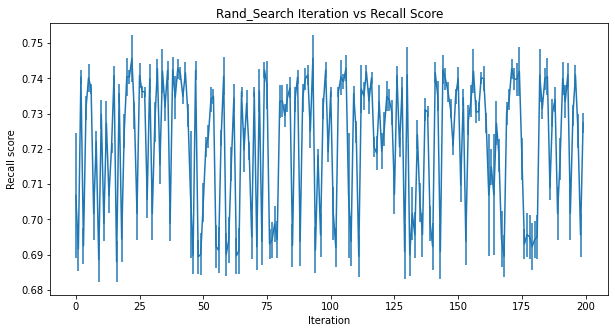

[(22, 0.7456521011567953), (93, 0.7456521011567953), (106, 0.7429045924034912), (32, 0.742752299024688), (40, 0.742752299024688)]
Best Parameters:  {'randomforest_clf__n_estimators': 10, 'randomforest_clf__min_samples_split': 4, 'randomforest_clf__min_samples_leaf': 10, 'randomforest_clf__max_features': 'log2', 'randomforest_clf__max_depth': 10, 'randomforest_clf__criterion': 'entropy'}
Best Score:  0.7456521011567953


In [172]:
rand_search = rand_search_eval(X_train, y_train, pipe_tuning, hype_params)

In [174]:
rand_search.best_params_

{'randomforest_clf__criterion': 'entropy',
 'randomforest_clf__max_depth': 10,
 'randomforest_clf__max_features': 'log2',
 'randomforest_clf__min_samples_leaf': 10,
 'randomforest_clf__min_samples_split': 4,
 'randomforest_clf__n_estimators': 10}

In [176]:
final_model = rand_search

# Confirming Model Results
scores = cross_val_score(final_model.best_estimator_, X_train, y_train, cv=10, scoring="recall", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [73.58778626 72.90076336 73.30282227 75.28604119 73.76048818 74.37070938
 74.67581998 73.37909992 74.29443173 73.45537757]
Mean: 73.90133398547813
Standard Deviation: 0.006957869508000188


In [183]:
pred_te = final_model.predict(X_test)

print(recall_score(y_test, pred_te) * 100)

print(accuracy_score(y_test, pred_te) * 100)

77.7563202247191
78.66


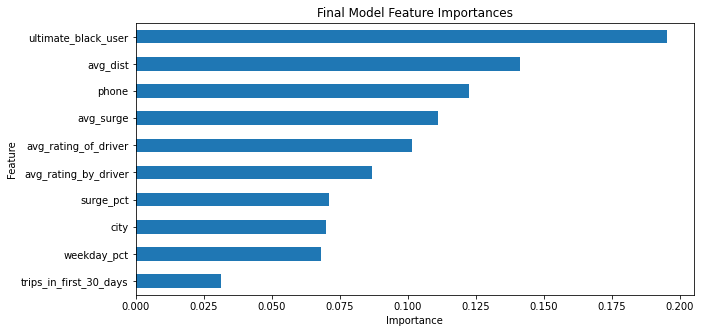

In [179]:
plt.subplots(figsize=(10, 5))
imps_features = final_model.best_estimator_.named_steps.randomforest_clf.feature_importances_
col_names = [col for col in X_train.columns]
final_model_imps = pd.Series(imps_features, index=col_names).sort_values(ascending=True)
final_model_imps.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Final Model Feature Importances');
plt.show()

In [182]:
# Saving Model as Pickle

# Fit Final Model to Entire Training Data
final_model.best_estimator_.fit(X, encoded_y)

# Saving Best Model
best_model = final_model.best_estimator_

# Save the model as a pickle in a file
joblib.dump(best_model, os.path.join(file_path, "best_model.pkl"))

['/content/drive/MyDrive/Colab Notebooks/Springboard - ultimate_challenge/best_model.pkl']

My final random forest classifier has a 78.7% accuracy score in prediction power and a 77.8% recall score on the test set, a 12% increase over the baseline model with hyperparameter tuning. Although the model's prediction power is below 90%, as a number's game to identity potential long term customers, it is a usable model. Given that it is also a decision tree based classifier, I am able to idenity important features that contribute the most to classification. "Ultimate_black_user" and "avg_dist" features contributed as the top two features in identifying long term users. A business plan could be to add additional benefits to push these features for customers to improve long term rider retention.